In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

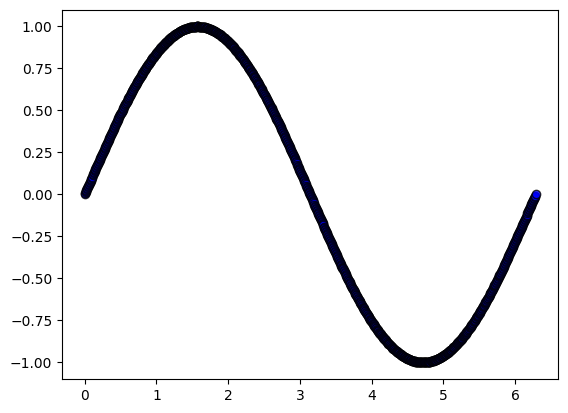

In [2]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x) 

plt.scatter(x, y, c='blue', 
            edgecolor='black', alpha=0.8)
plt.show()

In [3]:
length_sequence = 10
inputs, targets = [], []

for i in range(len(x)):
    try:
        row = y[i: i + length_sequence]
        target = y[i + length_sequence]
    except:
        continue
    inputs.append([[j] for j in row])
    targets.append([target])

inputs = np.array(inputs)
targets = np.array(targets)

In [9]:
from RNN import RNN

input_units = length_sequence
output_units = 1
hidden_units = 8
learning_rate = 0.005

lstm = RNN(input_units=input_units, output_units=output_units, 
           lr=learning_rate, hidden_units=hidden_units, 
           dtype='many-to-one')

In [10]:
epochs = 100
cost = []

for epoch in range(epochs):
    
    loss = 0
    
    for input_t, target_t in zip(inputs, targets):
        loss, predictions, outputs, hidden_outputs, hidden_states = lstm.forward([input_t], [target_t])
        
        lstm.backward([input_t], [target_t], predictions, outputs, hidden_outputs, hidden_states)
        lstm.update_weigths()
    
    cost.append(loss / len(input_t))
    
    if not epoch % 10:
        print(loss / len(input_t))

0.053332870395853785
2.2037595739314116e-06
1.6807788826621807e-05
1.1890404464945863e-05
8.568775070147352e-06
6.438318650445066e-06
5.038665176616696e-06
4.098543056255897e-06
3.455066502638817e-06
3.0077265419654596e-06


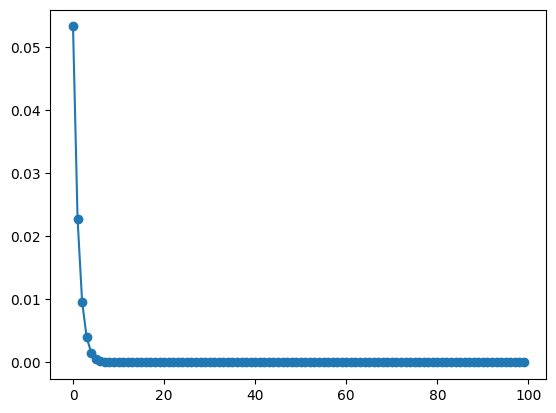

In [11]:
plt.plot(cost, '-o')

In [12]:
predictions = []

for x_t in inputs:
    prediction = lstm.predict([x_t])
    predictions.append(prediction)
    
print(predictions[:4])

[[array([[0.07292545]])], [array([[0.07968157]])], [array([[0.08643067]])], [array([[0.09317217]])]]


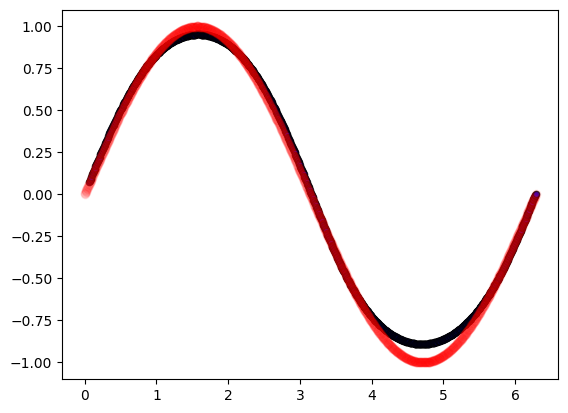

In [16]:
for i, prediction in enumerate(predictions):
    slice_x = x[i + length_sequence]
    plt.scatter(slice_x, prediction, 
                c='blue', alpha=.8, s=20, 
                edgecolor='black')
    
plt.scatter(x, y, c='red', alpha=0.1)
plt.show()